In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
# warnings.simplefilter(action="ignore", category=DeprecationWarning)
# warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings('ignore')




In [40]:
#Using housing prices from the 1990 California Census found here: https://www.kaggle.com/datasets/camnugent/california-housing-prices
df = pd.read_csv(r'S:\Data\housing_prices_CA1990.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [42]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [43]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [44]:
#With 20k rows of data, we could easily just drop the NA rows in the total_bedrooms
#However, I'll use this as an opportunity to demonstrate sklearn's SimpleImputer using the median, as this dataset is right skew.
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
df['total_bedrooms']  = imputer.fit_transform(df['total_bedrooms'].values.reshape(-1,1))[:,0]

df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

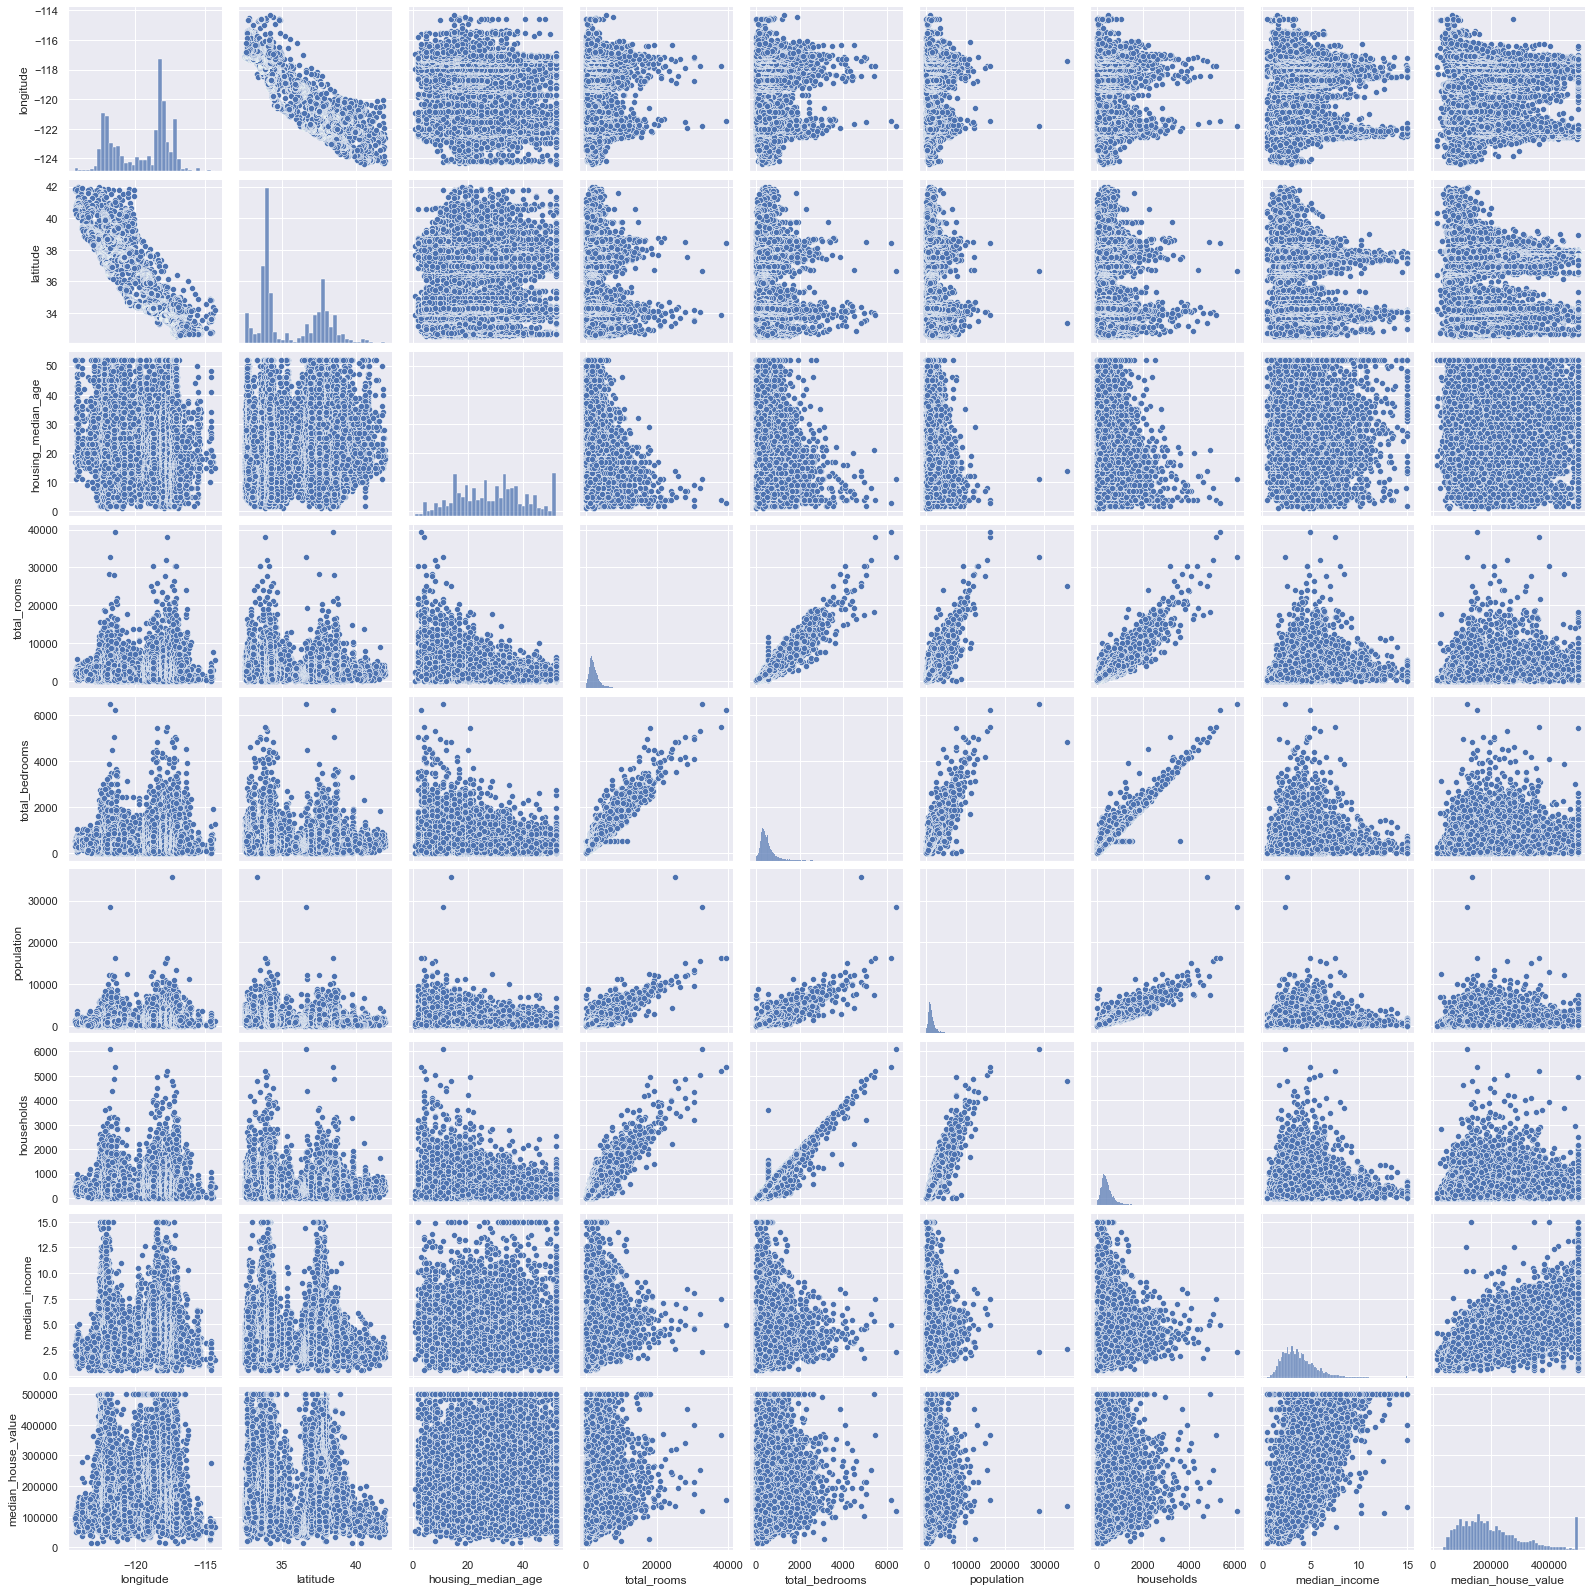

In [45]:
#Get a quick grip on visualizing the data. Lat and Long form an outline of California, which is pretty neat.
sns.pairplot(df)

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

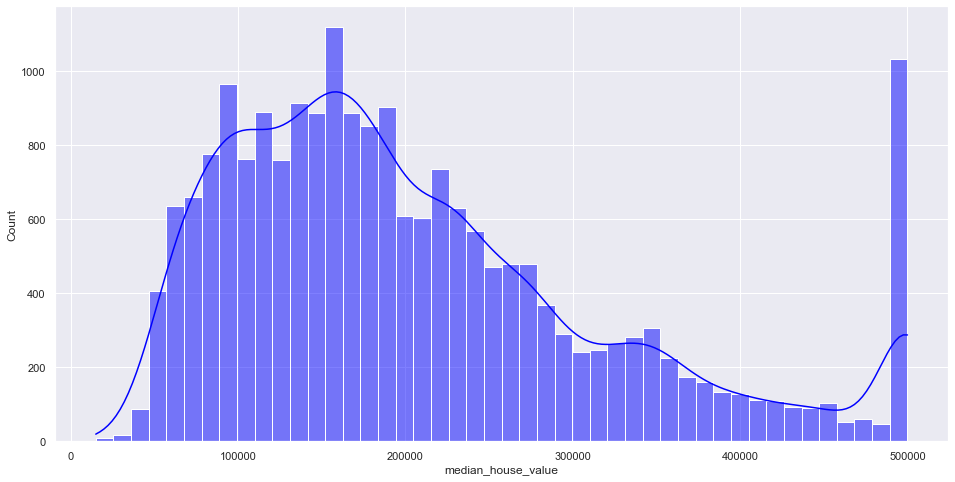

In [46]:
#Distrbiution of home values

#Define figure size
sns.set(rc={"figure.figsize":(16, 8)}) #width=16, height=8

sns.histplot(data = df
            ,x='median_house_value'
            ,color = 'blue'
            ,kde = True
            )

<AxesSubplot:xlabel='median_income', ylabel='Count'>

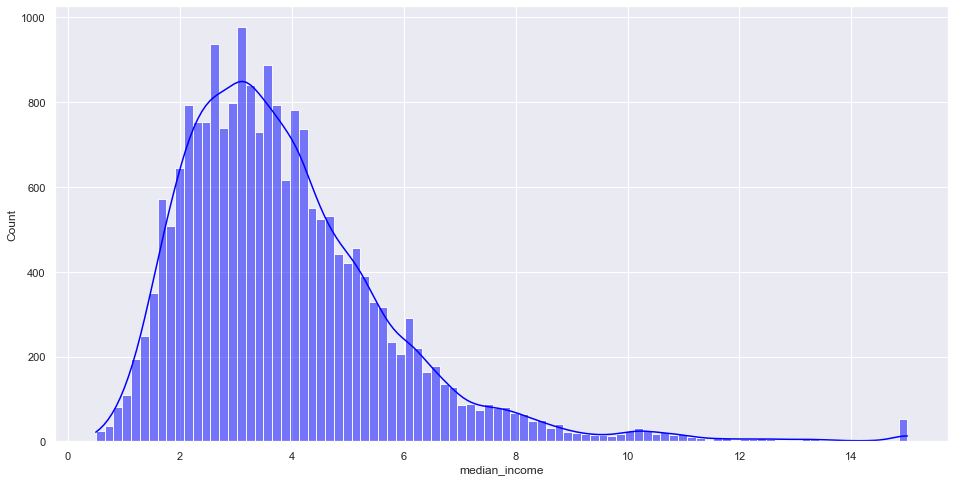

In [47]:
#Distrbiution of Income

#Define figure size
sns.set(rc={"figure.figsize":(16, 8)}) #width=16, height=8

sns.histplot(data = df
            ,x='median_income'
            ,color = 'blue'
            ,kde = True
            )

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

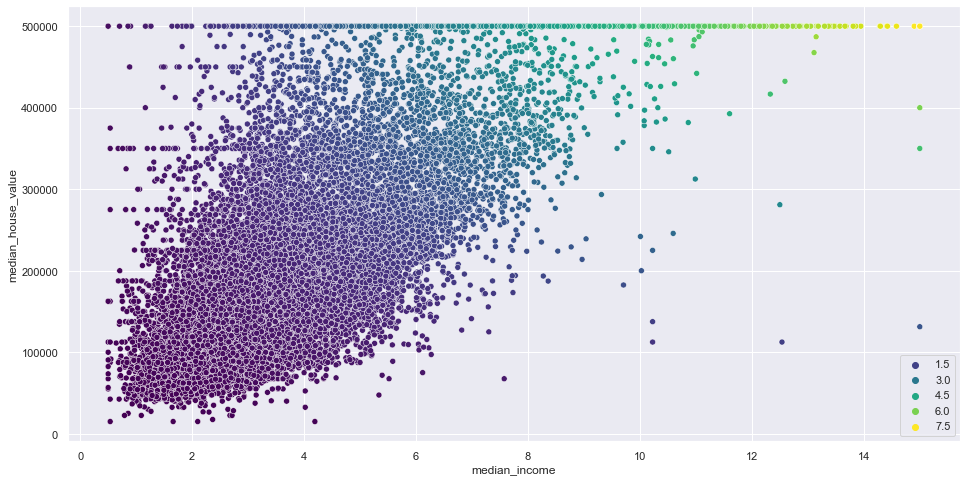

In [48]:
#Income vs. Home Value

#Define figure size
sns.set(rc={"figure.figsize":(16, 8)}) #width=16, height=8

hue = df['median_income'] * df['median_house_value']
sns.scatterplot(data=df, x="median_income", y="median_house_value", hue=hue,palette='viridis')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

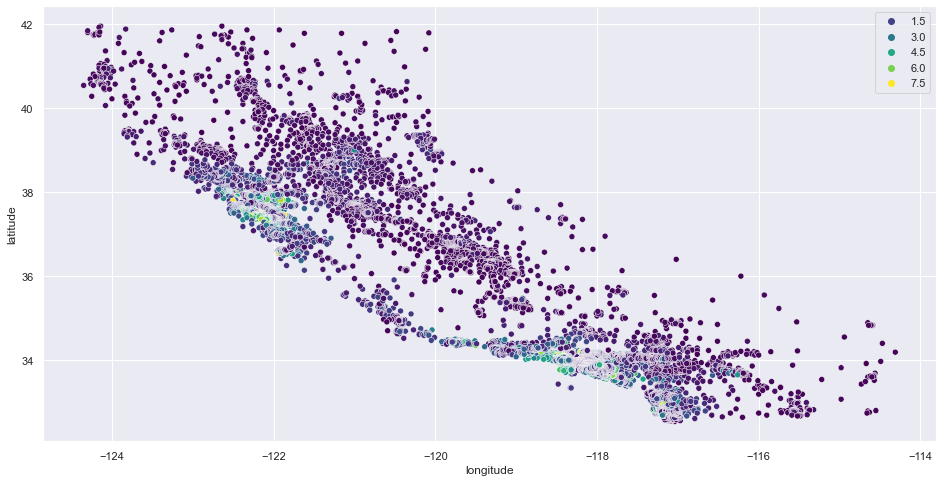

In [49]:
#Home Age vs. Home Value
#Definitely an outline of California, although not a mercator projection. We can see the densities of Sacramento, Bay Area, LA, and San Diego

#Define figure size
sns.set(rc={"figure.figsize":(16, 8)}) #width=16, height=8

hue = df['median_income'] * df['median_house_value']
sns.scatterplot(data=df, x="longitude", y="latitude", hue=hue,palette='viridis')

<AxesSubplot:>

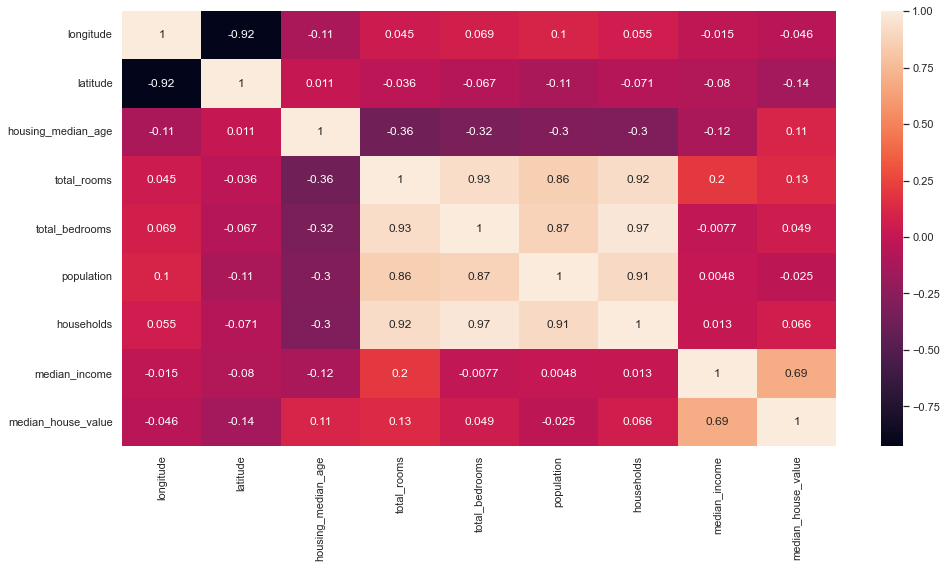

In [50]:
#Correlation Matriy
sns.heatmap(df.corr(), annot=True)

In [51]:
#Let's get into our modeling. We will first need to get dummies for our one categorical column, ocean proyimity,
#apply our scaler and then split our dataset
from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import Pipeline

target = 'median_house_value'
sc = StandardScaler()

dummies = pd.get_dummies(df['ocean_proximity'])
df_wdummies = pd.merge(df.drop(['ocean_proximity'],axis=1),dummies,left_index=True,right_index=True)
#Transform our features
cols_list = df_wdummies.columns.to_list()
df_wdummies[cols_list] = sc.fit_transform(df_wdummies[cols_list])

X = df_wdummies.drop('median_house_value',axis=1)
y = df[target]

y.head()


0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [52]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [53]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

print(lin_reg.intercept_)

coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

206805.6662929851


,Coefficient
longitude,-53096.716943
latitude,-53217.161944
housing_median_age,13918.972431
total_rooms,-12810.842708
total_bedrooms,44324.357379
population,-42270.354891
households,16177.207456
median_income,74603.588210
<1H OCEAN,6752.157597
INLAND,-12791.816459


In [54]:
pred = lin_reg.predict(X_test)

<AxesSubplot:xlabel='True Values', ylabel='Predicted Values'>

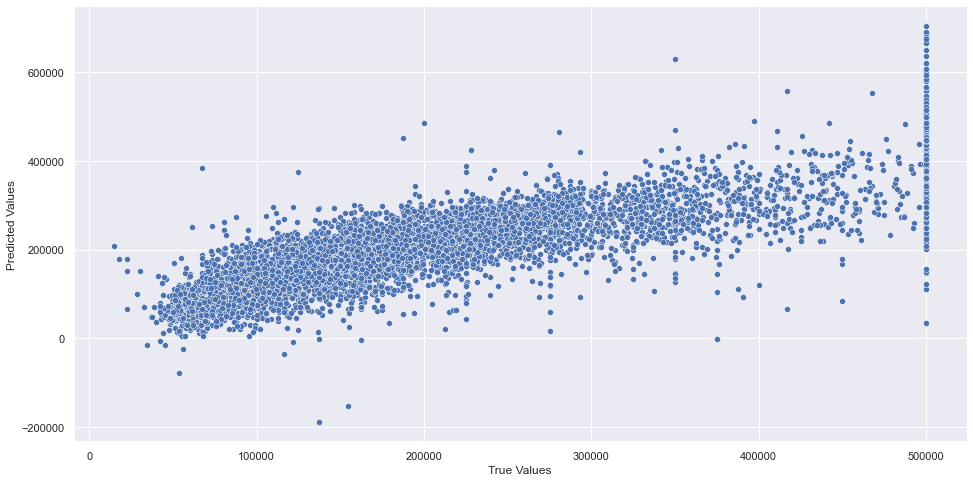

In [55]:
pred_df = pd.DataFrame({'True Values': y_test, 'Predicted Values': pred})

pred_df
sns.scatterplot(data=pred_df, x='True Values', y='Predicted Values')

#hue=hue,palette='viridis')

In [56]:

test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 50100.14616553774
MSE: 4730676245.231667
RMSE: 68779.91164018508
R2 Square 0.6395785380523744
__________________________________
Train set evaluation:
_____________________________________
MAE: 49723.37021129251
MSE: 4728483441.955843
RMSE: 68763.969067789
R2 Square 0.6470480227253683
__________________________________


In [57]:
#Random Sample Consensus - RANSAC Modeling
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, test_pred) , cross_val(RANSACRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 163052370272.3346
MSE: 1.6462087305200992e+26
RMSE: 12830466595257.162
R2 Square -1.2542159441222612e+16
__________________________________
Train set evaluation:
_____________________________________
MAE: 279518311326.09076
MSE: 2.8220721090015796e+26
RMSE: 16799024105588.93
R2 Square -2.106501890322151e+16
__________________________________


In [58]:
#Ridge Regression Modeling
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 50019.58665138799
MSE: 4722302079.253929
RMSE: 68719.00813642415
R2 Square 0.6402165502493262
__________________________________
Train set evaluation:
_____________________________________
MAE: 49719.79391863008
MSE: 4736938830.784832
RMSE: 68825.42285220507
R2 Square 0.6464168803638793
__________________________________


In [59]:
#Lasso Regression -- Giving convergence warning even with max iterations and tolerance values. I'll need to revise this one.
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
              normalize=True,
              tol=1e-2,
              max_iter=5000,
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 52766.690759997575
MSE: 5221046508.707073
RMSE: 72256.80942794992
R2 Square 0.602218135840197
__________________________________
Train set evaluation:
_____________________________________
MAE: 52888.81147368436
MSE: 5272588393.023341
RMSE: 72612.59114660033
R2 Square 0.6064339610115865
__________________________________


In [60]:
#Elastic Net Modeling

from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 50024.35397326872
MSE: 4725189824.102105
RMSE: 68740.01617763925
R2 Square 0.6399965383174253
__________________________________
Train set evaluation:
_____________________________________
MAE: 49747.57734997138
MSE: 4743576081.770906
RMSE: 68873.62399185124
R2 Square 0.645921450721805
__________________________________


In [61]:
#Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 12476863878367.527
MSE: 9.639218357900317e+29
RMSE: 981795210718626.2
R2 Square -7.343941949290357e+19
__________________________________
Train set evaluation:
_____________________________________
MAE: 43952.72515227021
MSE: 3808226901.8948646
RMSE: 61710.832937944244
R2 Square 0.7157394688098414
__________________________________


In [62]:
#Stochastic Gradient Descent Modeling
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 50095.13041135037
MSE: 4729522944.5620165
RMSE: 68771.527135596
R2 Square 0.639666405894491
__________________________________
Train set evaluation:
_____________________________________
MAE: 49722.85416353008
MSE: 4728486672.792831
RMSE: 68763.99256000797
R2 Square 0.6470477815634149
__________________________________


In [63]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 31677.89317845607
MSE: 2361026224.338713
RMSE: 48590.392304844725
R2 Square 0.820117784570318
__________________________________
Train set evaluation:
_____________________________________
MAE: 11800.080857419713
MSE: 328862823.2720281
RMSE: 18134.575354058557
R2 Square 0.9754524288493714
__________________________________


In [64]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 36271.68424695992
MSE: 3044228383.675654
RMSE: 55174.52658315841
R2 Square 0.7680658773356609
__________________________________
Train set evaluation:
_____________________________________
MAE: 33248.84617108791
MSE: 2755739230.5478125
RMSE: 52495.135303643256
R2 Square 0.7943011491496715
__________________________________


In [69]:
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,5.010015e+04,4.730676e+09,6.877991e+04,6.395785e-01,-2.731942e+20
1,Robust Regression,1.630524e+11,1.646209e+26,1.283047e+13,-1.254216e+16,-2.304496e+19
2,Ridge Regression,5.001959e+04,4.722302e+09,6.871901e+04,6.402166e-01,5.140806e-01
3,Lasso Regression,5.276669e+04,5.221047e+09,7.225681e+04,6.022181e-01,5.140781e-01
4,Elastic Net Regression,5.002435e+04,4.725190e+09,6.874002e+04,6.399965e-01,4.298165e-01
5,Polynomail Regression,1.247686e+13,9.639218e+29,9.817952e+14,-7.343942e+19,0.000000e+00
6,Stochastic Gradient Descent,5.009513e+04,4.729523e+09,6.877153e+04,6.396664e-01,0.000000e+00
7,Random Forest Regressor,3.167789e+04,2.361026e+09,4.859039e+04,8.201178e-01,0.000000e+00
8,SVM Regressor,3.627168e+04,3.044228e+09,5.517453e+04,7.680659e-01,0.000000e+00


In [86]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
results = results_df.loc[(results_df['R2 Square'] >= -1.0) & (results_df['R2 Square'] <= 1.0)]
results

,MAE,MSE,RMSE,R2 Square,Cross Validation
Model,,,,,
Linear Regression,50100.14617,4730676245.23167,68779.91164,0.63958,-273194162952911912960.00000
Ridge Regression,50019.58665,4722302079.25393,68719.00814,0.64022,0.51408
Lasso Regression,52766.69076,5221046508.70707,72256.80943,0.60222,0.51408
Elastic Net Regression,50024.35397,4725189824.10211,68740.01618,0.64000,0.42982
Stochastic Gradient Descent,50095.13041,4729522944.56202,68771.52714,0.63967,0.00000
Random Forest Regressor,31677.89318,2361026224.33871,48590.39230,0.82012,0.00000
SVM Regressor,36271.68425,3044228383.67565,55174.52658,0.76807,0.00000


<AxesSubplot:ylabel='Model'>

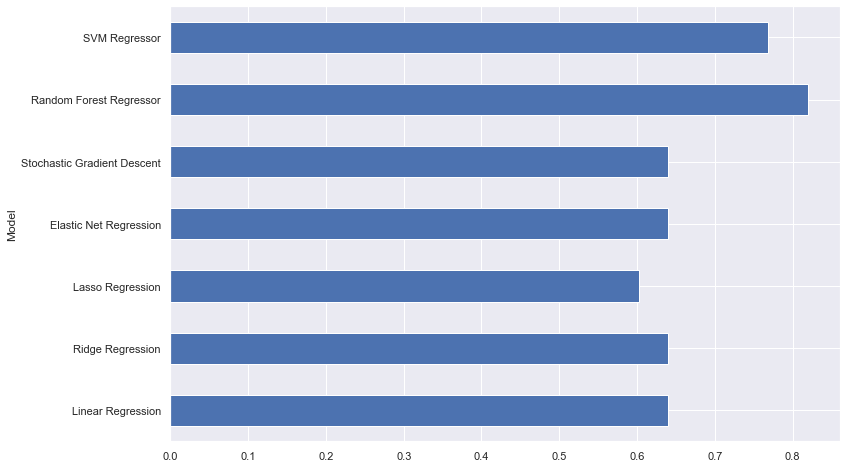

In [88]:
results.set_index('Model', inplace=True)
results['R2 Square'].plot(kind='barh', figsize=(12, 8))